In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
NSC_CLUSTERED_WITHOUT_OUTLIERS = './data/농수축_군집4개_이상치제외.csv'
NSC_CLUSTERED_WITH_OUTLIERS = './data/농수축_군집5개_이상치포함.csv'

# 이상치 제외 군집 4개

In [3]:
# 데이터 로드
data = pd.read_csv(NSC_CLUSTERED_WITHOUT_OUTLIERS)
data

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0
2,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-06 17:20:00,2019-11-06 18:20:00,60.0,49900,108299000,2170.320641,3.0
3,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-12-06 17:20:00,2019-12-06 18:20:00,60.0,49900,126137000,2527.795591,3.0
4,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-12-13 16:20:00,2019-12-13 17:20:00,60.0,49900,105122000,2106.653307,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1312,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-05 15:00:00,2019-12-05 15:20:00,20.0,58900,52542000,892.054329,1.0
1313,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-11 15:00:00,2019-12-11 15:20:00,20.0,58900,45331000,769.626486,1.0
1314,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-14 17:40:00,2019-12-14 18:00:00,20.0,58900,51303000,871.018676,1.0
1315,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-20 17:20:00,2019-12-20 17:40:00,20.0,58900,56239000,954.821732,1.0


In [4]:
# 전체 요약통계량 확인
data.describe()

,마더코드,상품코드,노출(분),판매단가,취급액,판매량,Cluster
count,1317.000000,1317.000000,1317.000000,1317.000000,1.317000e+03,1317.000000,1264.000000
mean,100442.293090,201381.275626,57.742394,46875.550494,1.260002e+08,2867.124589,1.621044
std,281.877607,811.546571,8.581918,12735.811962,5.266782e+07,1425.572911,1.231508
min,100002.000000,200002.000000,14.983333,28900.000000,4.786000e+06,119.949875,0.000000
25%,100199.000000,200671.000000,60.000000,38900.000000,9.768400e+07,1911.833741,0.000000
50%,100491.000000,201485.000000,60.000000,49900.000000,1.234480e+08,2660.781563,2.000000
75%,100704.000000,202074.000000,60.000000,55900.000000,1.548870e+08,3742.735562,3.000000
max,100849.000000,202513.000000,80.000000,109900.000000,4.121600e+08,9936.699029,3.000000


## _1_. 컬럼 추가 및 변경

In [5]:
# 컬럼 유형 변경
data['방송시작'] = pd.to_datetime(data['방송시작'])
data['방송종료'] = pd.to_datetime(data['방송종료'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   마더코드     1317 non-null   int64         
 1   상품코드     1317 non-null   int64         
 2   상품군      1317 non-null   object        
 3   상품명      1317 non-null   object        
 4   방송시작     1317 non-null   datetime64[ns]
 5   방송종료     1317 non-null   datetime64[ns]
 6   노출(분)    1317 non-null   float64       
 7   판매단가     1317 non-null   int64         
 8   취급액      1317 non-null   int64         
 9   판매량      1317 non-null   float64       
 10  Cluster  1264 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 113.3+ KB


In [6]:
# 월 컬럼 추가
data['월'] = data['방송시작'].dt.month
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11


In [7]:
# 계절 컬럼 추가
season_mapping_dict = {1:'겨울', 2:'겨울', 3:'봄', 4:'봄', 5:'봄', 6:'여름', 7:'여름', 8:'여름', 9:'가을', 10:'가을', 11:'가을', 12:'겨울'}
data['계절'] = data['월'].map(season_mapping_dict)
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을


In [8]:
# 요일 컬럼 추가
data['요일'] = data['방송시작'].dt.dayofweek
day_mapping_dict = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}
data['요일'] = data['요일'].map(day_mapping_dict)
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절,요일
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을,화요일
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을,금요일


In [9]:
# 방송시간대 컬럼 추가
def time_to_str(x):
    return x.strftime('%H')
data['방송시간대'] = data['방송시작'].dt.time.apply(lambda x: time_to_str(x))
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절,요일,방송시간대
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을,화요일,17
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을,금요일,17


In [10]:
# 컬럼 순서 변경
data = data[['월', '계절', '요일', '방송시작', '방송종료', '방송시간대', '노출(분)', \
             '상품군', '마더코드', '상품코드', '상품명', '판매단가', '판매량', '취급액', 'Cluster']]
data

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
0,10,가을,화요일,2019-10-29 17:00:00,2019-10-29 18:00:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2574.809619,128483000,3.0
1,11,가을,금요일,2019-11-01 17:20:00,2019-11-01 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2068.256513,103206000,3.0
2,11,가을,수요일,2019-11-06 17:20:00,2019-11-06 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2170.320641,108299000,3.0
3,12,겨울,금요일,2019-12-06 17:20:00,2019-12-06 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2527.795591,126137000,3.0
4,12,겨울,금요일,2019-12-13 16:20:00,2019-12-13 17:20:00,16,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2106.653307,105122000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,12,겨울,목요일,2019-12-05 15:00:00,2019-12-05 15:20:00,15,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,892.054329,52542000,1.0
1313,12,겨울,수요일,2019-12-11 15:00:00,2019-12-11 15:20:00,15,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,769.626486,45331000,1.0
1314,12,겨울,토요일,2019-12-14 17:40:00,2019-12-14 18:00:00,17,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,871.018676,51303000,1.0
1315,12,겨울,금요일,2019-12-20 17:20:00,2019-12-20 17:40:00,17,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,954.821732,56239000,1.0


In [11]:
# 범주형 변수 변경
data['월'] = pd.Categorical(data['월'])
data['계절'] = pd.Categorical(data['계절'])
data['요일'] = pd.Categorical(data['요일'])
data['상품군'] = pd.Categorical(data['상품군'])
data['마더코드'] = pd.Categorical(data['마더코드'])
data['상품코드'] = pd.Categorical(data['상품코드'])
data['판매단가'] = data['판매단가'].astype('float')
data['취급액'] = data['취급액'].astype('float')
data['Cluster'] = pd.Categorical(data['Cluster'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   월        1317 non-null   category      
 1   계절       1317 non-null   category      
 2   요일       1317 non-null   category      
 3   방송시작     1317 non-null   datetime64[ns]
 4   방송종료     1317 non-null   datetime64[ns]
 5   방송시간대    1317 non-null   object        
 6   노출(분)    1317 non-null   float64       
 7   상품군      1317 non-null   category      
 8   마더코드     1317 non-null   category      
 9   상품코드     1317 non-null   category      
 10  상품명      1317 non-null   object        
 11  판매단가     1317 non-null   float64       
 12  판매량      1317 non-null   float64       
 13  취급액      1317 non-null   float64       
 14  Cluster  1264 non-null   category      
dtypes: category(7), datetime64[ns](2), float64(4), object(2)
memory usage: 105.9+ KB


# _2_. 클러스터별 EDA

In [64]:
def plotCatNum(df, x_list, y, plot_type, agg_func=None):
    assert len(x_list) % 2 == 0
    
    # 그래프 유형
    if plot_type == 'bar':
        plot = sns.barplot        
        # bar type일 때 집계 방법
        if agg_func == 'sum':
            func = np.sum
        elif agg_func == 'mean':
            func = np.mean
    elif plot_type == 'box':
        plot = sns.boxplot
    else:
        print("plot 유형 정확한지 확인")
        plot = plot_type
        
    # subplot으로 나타내기    
    row_num, col_num = 2, len(x_list)//2
    
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num)
    fig.set_size_inches(col_num*4, row_num*3)
    
    for i in range(len(x_list)):
        row, col = i//col_num, i%col_num
        if plot_type=='bar':
            if agg_func == 'sum':
                sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=np.sum)
            elif agg_func == 'mean':
                sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=np.mean)
            else:
                try:
                    sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=agg_func)
                except:
                    return "집계함수 확인할 것"

        elif plot_type=='box':
            sns.boxplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col])
            agg_func = ''
    
    fig.suptitle(f'각 범주별 {y} {agg_func}', size=15)
    plt.tight_layout()
    plt.show()

def countCatCat(df, x, y):
    plt.figure(figsize=(12, 12))
    sns.heatmap(df.groupby(by=x)[y].value_counts().unstack().fillna(0),
                annot=True, cmap='YlGnBu')
    plt.title(f'{y}별 {x}의 개수')
    plt.show()

In [12]:
# 클러스터별로 분리
df_0 = data[data['Cluster'] == 0]
df_1 = data[data['Cluster'] == 1]
df_2 = data[data['Cluster'] == 2]
df_3 = data[data['Cluster'] == 3]
df_out = data[data['Cluster'].isnull()]

## 전체 클러스터

### 취급액: 종속변수
- 1 < 0, 3 < 2 순.
- cluster0, cluster3이 겹친다.
    - cluster0 취급액 분포는 괜찮다.
    - cluster3 취급액 분포에 이상치가 있다.
- 이상치의 취급액 분포가 넓긴 하다.

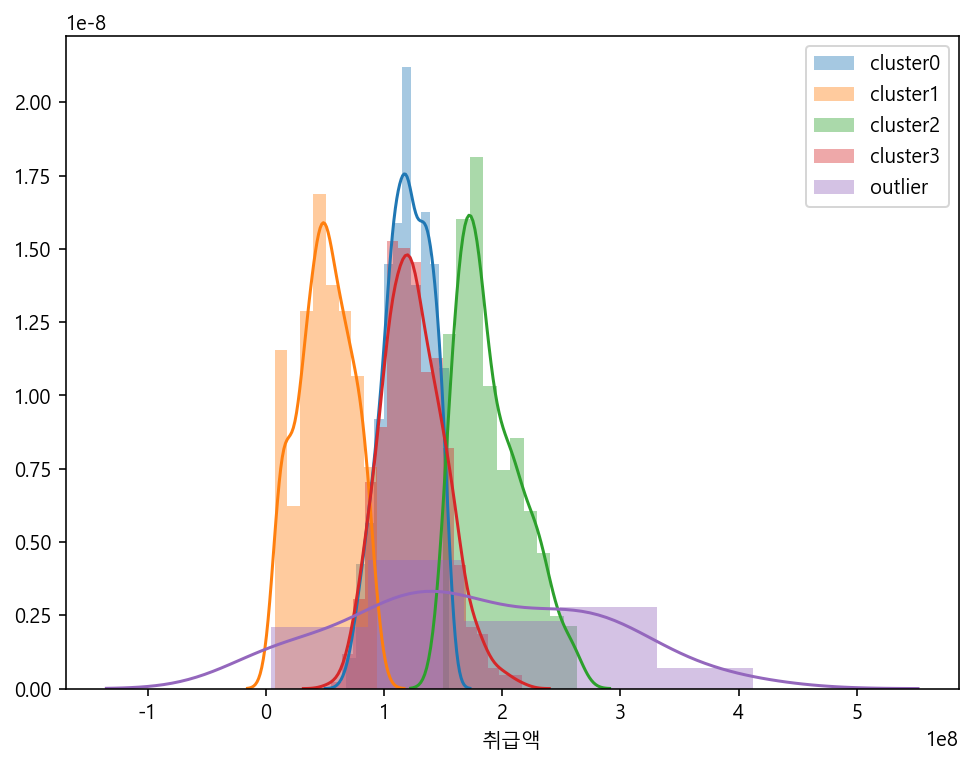

In [13]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['취급액'], label='cluster0')
sns.distplot(df_1['취급액'], label='cluster1')
sns.distplot(df_2['취급액'], label='cluster2')
sns.distplot(df_3['취급액'], label='cluster3')
sns.distplot(df_out['취급액'], label='outlier')
plt.legend()
plt.show()

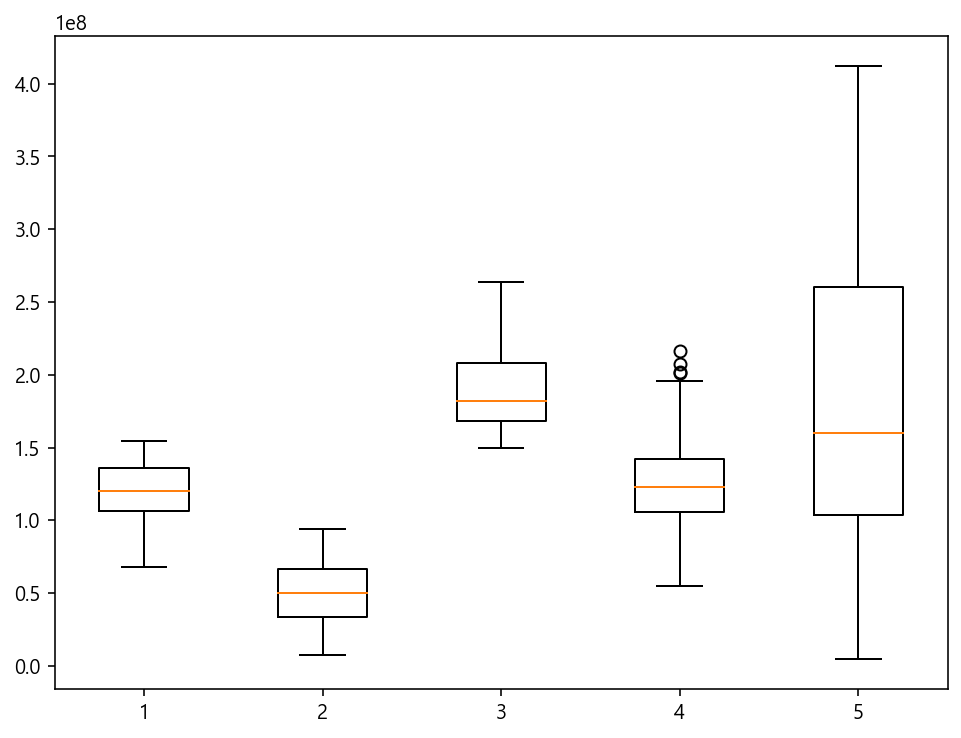

In [14]:
# 전체 취급액 boxplot

plt.figure(figsize=(8, 6))
sales = [df_0['취급액'], df_1['취급액'], df_2['취급액'], df_3['취급액'], df_out['취급액']]
plt.boxplot(sales)
plt.show()

### 노출(분)
- 클러스터 1에 노출 적은 게 있고,
- 나머지는 전부 다 노출 비슷.

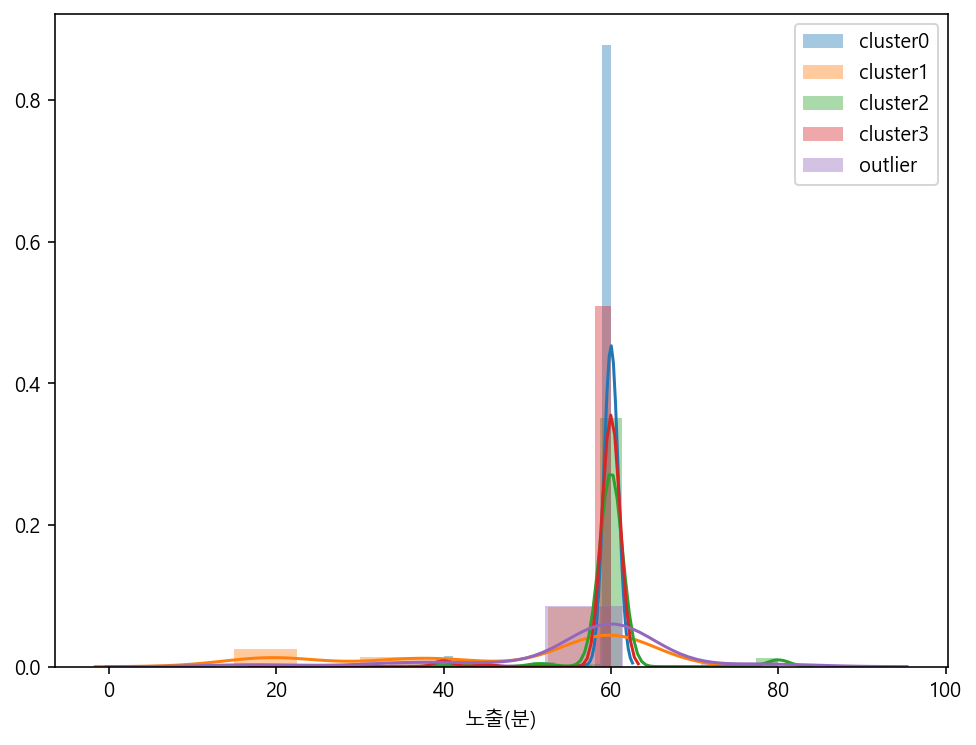

In [15]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['노출(분)'], label='cluster0')
sns.distplot(df_1['노출(분)'], label='cluster1')
sns.distplot(df_2['노출(분)'], label='cluster2')
sns.distplot(df_3['노출(분)'], label='cluster3')
sns.distplot(df_out['노출(분)'], label='outlier')
plt.legend()
plt.show()

### 판매단가
- 클러스터별로 다르다.
- 나중에 클러스터별로 봐야 할듯.
- outlier 빼고 판매단가 확인하면,
    - 0은 30000~45000원대,
    - 1은 30000~60000원대까지 골고루,
    - 2도 30000~60000원대까지 골고루,
    - 3은 50000~60000원대. 3에 이상치 있는데, 취급액에 있는 이상치가 여기서 온 게 아닐까?
- 취급액에서는 오히려 0, 3이 겹쳤는데, 판매단가는 1, 2가 겹친다.
    - 0, 3은 판매단가 비슷한데 취급액이 다르다.
        - 어떤 이유에서엔가 비슷한 판매단가 범위인데 결과는 다르다.
        - 시청률? 시간대?
    - 1, 2는 판매단가 안 비슷한데, 취급액이 겹친다.
        - 판매단가가 다른데, 취급액이 비슷하다면,
        - 위와 동일하게 시청률, 시간대, 계절 등 요인으로 인해 비슷한 결과인지,
        - 품목 자체가 둘 다 크게 판매단가에 영향을 받지 않는 것인지?

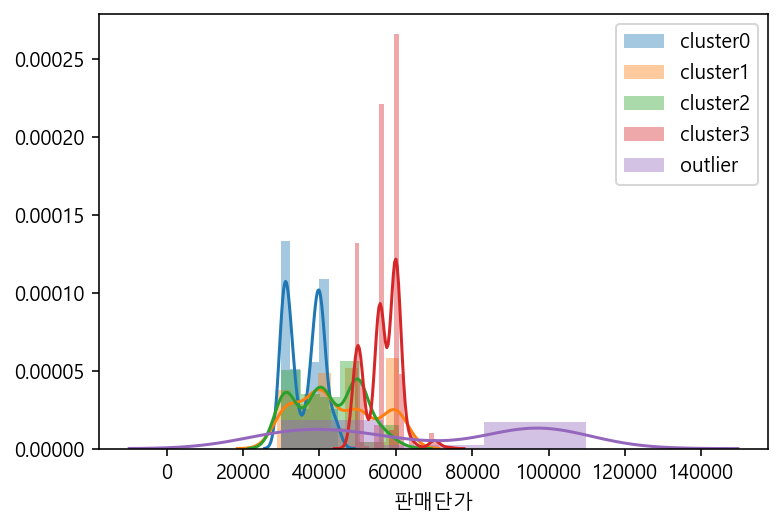

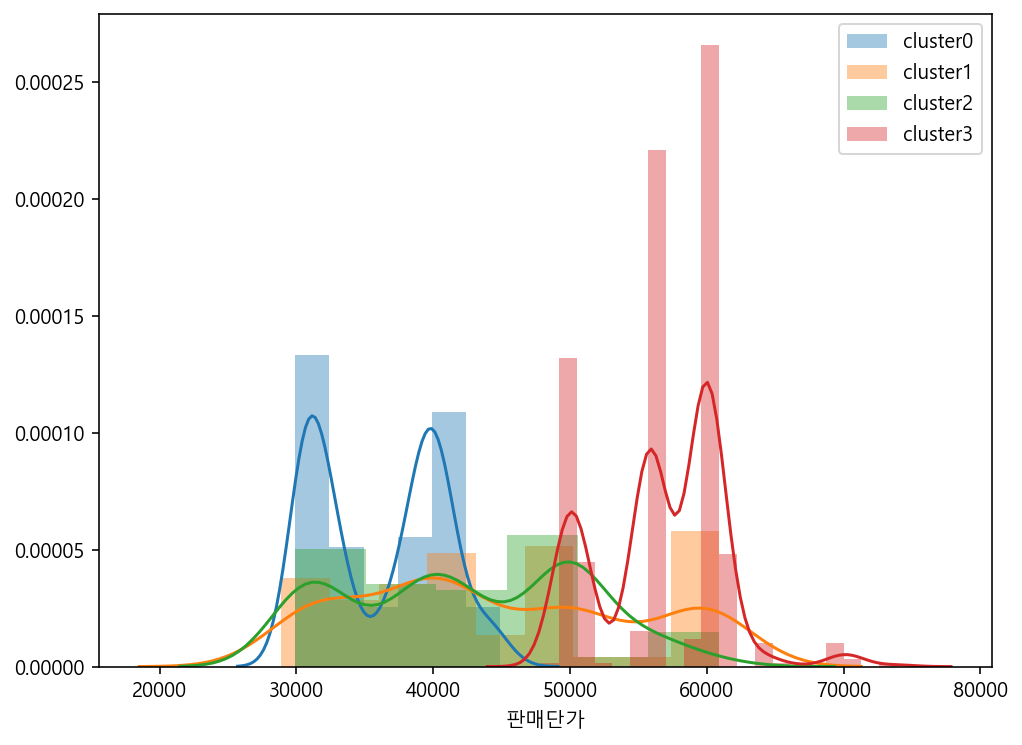

In [16]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(6, 4))
sns.distplot(df_0['판매단가'], label='cluster0')
sns.distplot(df_1['판매단가'], label='cluster1')
sns.distplot(df_2['판매단가'], label='cluster2')
sns.distplot(df_3['판매단가'], label='cluster3')
sns.distplot(df_out['판매단가'], label='outlier')
plt.legend()
plt.show()

# 이상치 제외
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['판매단가'], label='cluster0')
sns.distplot(df_1['판매단가'], label='cluster1')
sns.distplot(df_2['판매단가'], label='cluster2')
sns.distplot(df_3['판매단가'], label='cluster3')
plt.legend()
plt.show()

### 판매량
- 판매단가에 비해서는 군집별로 골고루 퍼져 있다.
- outlier 빼고 확인하면, 1, 3, 0, 2 순.
    - 1: 판매단가 퍼져있는 편이지만, 판매량 낮은 편 = 취급액 낮음.
    - 3: 판매단가 높은 편, 판매량 2등 = 취급액 중간.
    - 0: 판매단가 3보다 높은 편, 판매량 3보다 낮은 편 = 취급액 중간.
    - 2: 판매단가 퍼져 있는 편이지만, 판매량 높은 편 = 취급액 높음. 특히 판매량 퍼진 범위가 이상치 제외하면 제일 넓음.

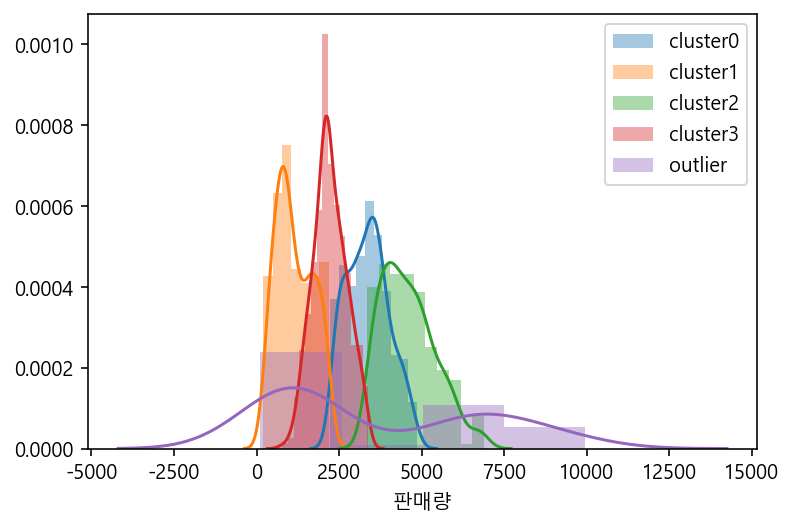

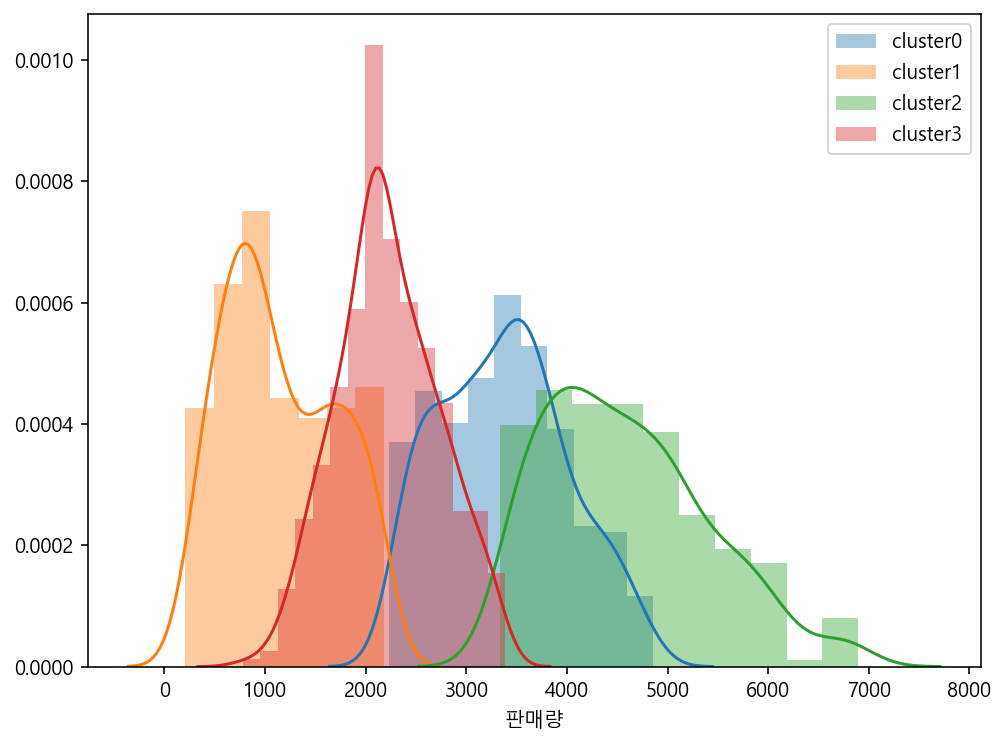

In [17]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(6, 4))
sns.distplot(df_0['판매량'], label='cluster0')
sns.distplot(df_1['판매량'], label='cluster1')
sns.distplot(df_2['판매량'], label='cluster2')
sns.distplot(df_3['판매량'], label='cluster3')
sns.distplot(df_out['판매량'], label='outlier')
plt.legend()
plt.show()

# 이상치 제외
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['판매량'], label='cluster0')
sns.distplot(df_1['판매량'], label='cluster1')
sns.distplot(df_2['판매량'], label='cluster2')
sns.distplot(df_3['판매량'], label='cluster3')
plt.legend()
plt.show()

## 클러스터 0
- 고만고만한 느낌.

### 요약 통계량, 상관관계
- 상관관계만 확인했을 때 크게 눈에 들어오는 건, `판매단가가 높은데 판매량 조금씩 떨어지는` 구조.

In [18]:
# 요약 통계량
df_0.describe()

,노출(분),판매단가,판매량,취급액
count,360.000000,360.000000,360.000000,3.600000e+02
mean,59.575370,36047.222222,3368.699634,1.199846e+08
std,2.783966,4557.034790,633.773759,1.942333e+07
min,40.000000,29900.000000,2228.906606,6.821400e+07
25%,60.000000,30900.000000,2847.629980,1.066262e+08
50%,60.000000,36900.000000,3379.842692,1.204450e+08
75%,60.000000,39900.000000,3809.407804,1.356598e+08
max,60.000000,44900.000000,4858.361204,1.547290e+08


,노출(분),판매단가,판매량,취급액
노출(분),1.000000,0.037568,0.131106,0.173485
판매단가,0.037568,1.000000,-0.502646,0.204859
판매량,0.131106,-0.502646,1.000000,0.735862
취급액,0.173485,0.204859,0.735862,1.000000


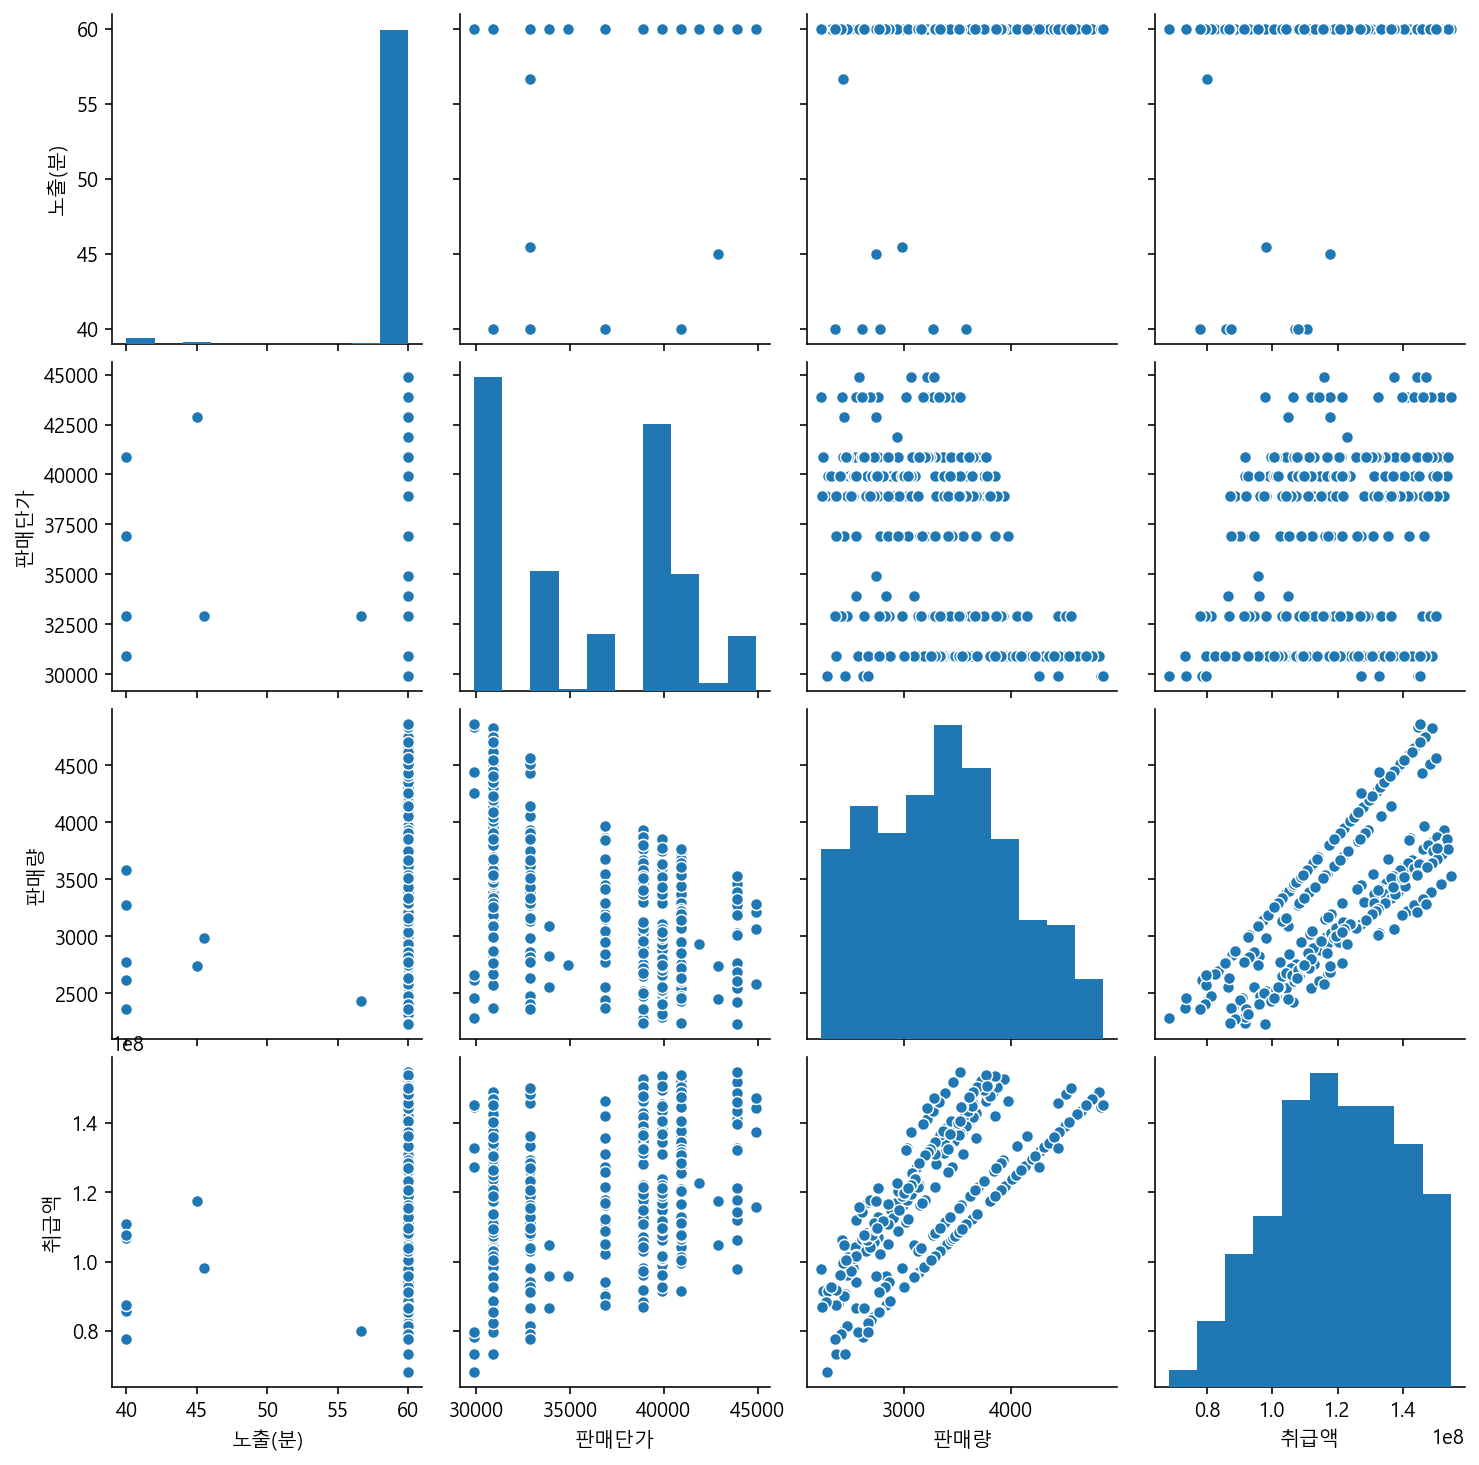

In [19]:
# 상관관계
display(df_0.corr())

# 그림: 판매단가, 판매량 사이에 mild하게 음의 상관관계가 있는 듯한데?
sns.pairplot(df_0[['노출(분)', '판매단가', '판매량', '취급액']])
plt.show()        

In [20]:
df_0.columns

Index(['월', '계절', '요일', '방송시작', '방송종료', '방송시간대', '노출(분)', '상품군', '마더코드',
       '상품코드', '상품명', '판매단가', '판매량', '취급액', 'Cluster'],
      dtype='object')

### 계절별, 월별 분포
- 계절별로 보면, **가을**이 눈에 띈다.
- 농수축 전체 상품 월별 분포와 비교했을 때, 상대적으로 3월, 5월, 9월이 많은 편.
> - 해산?수산?물 많다.
> - 9월에는 김치, 젓갈류.

    - 3월 상품: 간고등어, 통오징어, 왕꼬막, 홍어, 재첩국 // 쥐포.
    - 5월 상품: 간고등어, 통오징어 // 모시떡, 갓김치3kg+총각김치3kg (총6kg) // 쥐포.
    - 9월 상품: 간고등어, 통오징어, 손질갈치, 새우+동태, 재첩국, 젓갈세트, 손질낙지+연포탕, 황태 // 모시떡, 갓김치+오이소박이, 갓김치+총각김치, 포기김치, 포기김치+백김치 // 검은콩두유+아몬드두유, 강정바 // 닭발, 

- 우리가 예측해야 하는 6월은 여기에 많이 분포하지는 않는다.

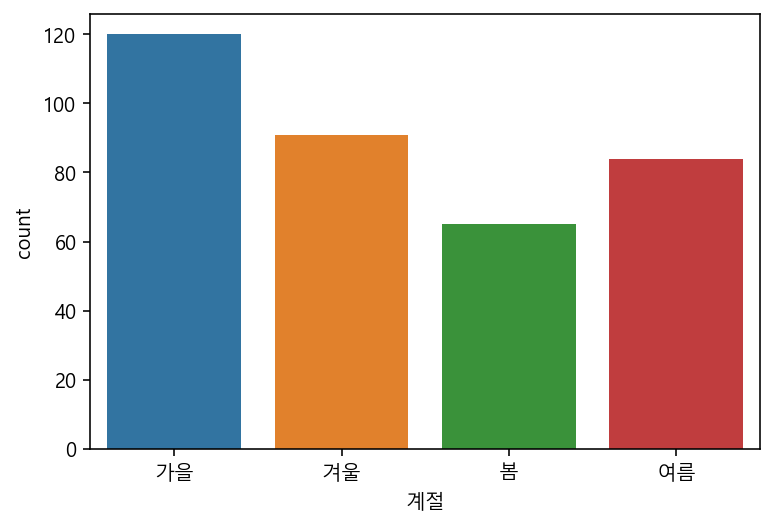

In [21]:
# 계절별 상품 분포
sns.countplot(df_0['계절'])

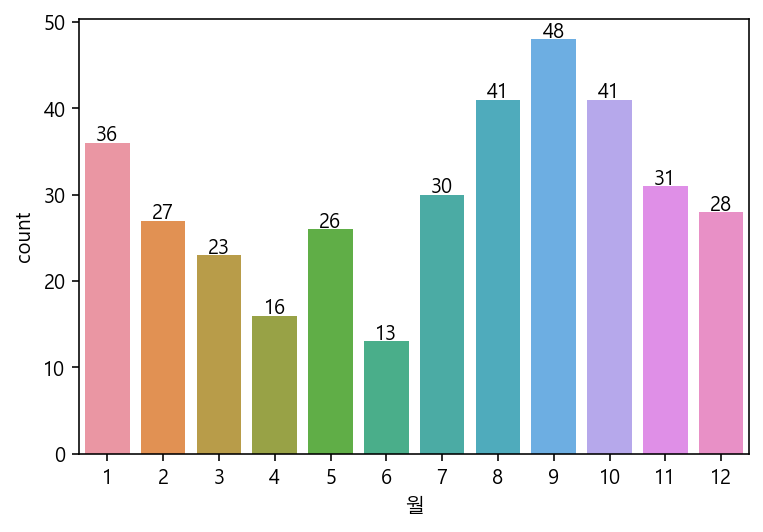

1     0.232258
2     0.287234
3     0.315068
4     0.258065
5     0.302326
6     0.185714
7     0.254237
8     0.242604
9     0.342857
10    0.317829
11    0.279279
12    0.254545
Name: 월, dtype: float64


In [22]:
# 월별 상품 분포
ax = sns.countplot(df_0['월'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print(df_0['월'].value_counts().sort_values().sort_index() / data['월'].value_counts().sort_values().sort_index())

In [23]:
# 3월 상품 확인
df_0[df_0['월'] == 3]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
405,3,봄,일요일,2019-03-03 17:00:00,2019-03-03 18:00:00,17,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,4075.210356,125924000.0,0.0
406,3,봄,수요일,2019-03-06 15:00:00,2019-03-06 16:00:00,15,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,3843.268608,118757000.0,0.0
407,3,봄,일요일,2019-03-10 17:00:00,2019-03-10 18:00:00,17,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,3944.724919,121892000.0,0.0
408,3,봄,화요일,2019-03-12 16:00:00,2019-03-12 17:00:00,16,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,4159.546926,128530000.0,0.0
409,3,봄,금요일,2019-03-15 18:00:00,2019-03-15 19:00:00,18,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,4415.210356,136430000.0,0.0
410,3,봄,화요일,2019-03-19 15:00:00,2019-03-19 16:00:00,15,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,3807.702265,117658000.0,0.0
411,3,봄,금요일,2019-03-22 18:00:00,2019-03-22 19:00:00,18,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,4303.754045,132986000.0,0.0
412,3,봄,월요일,2019-03-25 18:00:00,2019-03-25 19:00:00,18,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,3575.954693,110497000.0,0.0
413,3,봄,목요일,2019-03-28 17:00:00,2019-03-28 18:00:00,17,60.0,농수축,100253,200864,안동간고등어 20팩,30900.0,3436.828479,106198000.0,0.0
634,3,봄,수요일,2019-03-13 16:00:00,2019-03-13 17:00:00,16,60.0,농수축,100435,201349,우리바다 손질왕꼬막 20팩,39900.0,2875.438596,114730000.0,0.0


In [24]:
# 8월 상품 확인
df_0[df_0['월'] == 5]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
170,5,봄,목요일,2019-05-02 19:00:00,2019-05-02 20:00:00,19,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3257.734628,100664000.0,0.0
171,5,봄,일요일,2019-05-05 16:00:00,2019-05-05 17:00:00,16,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3944.822006,121895000.0,0.0
172,5,봄,월요일,2019-05-06 16:00:00,2019-05-06 17:00:00,16,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,4308.252427,133125000.0,0.0
173,5,봄,수요일,2019-05-08 18:00:00,2019-05-08 19:00:00,18,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3142.297735,97097000.0,0.0
174,5,봄,토요일,2019-05-11 15:00:00,2019-05-11 16:00:00,15,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,4550.517799,140611000.0,0.0
175,5,봄,화요일,2019-05-14 17:00:00,2019-05-14 18:00:00,17,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3658.090615,113035000.0,0.0
176,5,봄,월요일,2019-05-20 16:00:00,2019-05-20 17:00:00,16,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3358.640777,103782000.0,0.0
177,5,봄,목요일,2019-05-23 16:00:00,2019-05-23 17:00:00,16,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,2834.045307,87572000.0,0.0
178,5,봄,수요일,2019-05-29 17:00:00,2019-05-29 18:00:00,17,60.0,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,3375.566343,104305000.0,0.0
241,5,봄,금요일,2019-05-03 16:00:00,2019-05-03 17:00:00,16,60.0,농수축,100167,200589,유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg),38900.0,3116.323907,121225000.0,0.0


In [25]:
# 9월 상품 확인
df_0[df_0['월'] == 9]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
113,9,가을,월요일,2019-09-02 20:00:00,2019-09-02 21:00:00,20,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,2666.697039,117068000.0,0.0
116,9,가을,목요일,2019-09-05 18:00:00,2019-09-05 19:00:00,18,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,3459.658314,151879000.0,0.0
117,9,가을,금요일,2019-09-06 17:00:00,2019-09-06 18:00:00,17,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,2681.207289,117705000.0,0.0
119,9,가을,일요일,2019-09-08 11:00:00,2019-09-08 12:00:00,11,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,3268.268793,143477000.0,0.0
120,9,가을,일요일,2019-09-08 16:00:00,2019-09-08 17:00:00,16,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,3023.302961,132723000.0,0.0
145,9,가을,금요일,2019-09-06 06:00:00,2019-09-06 07:00:00,06,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,2714.401294,83875000.0,0.0
149,9,가을,수요일,2019-09-18 16:00:00,2019-09-18 17:00:00,16,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,4249.158576,131299000.0,0.0
150,9,가을,토요일,2019-09-21 07:00:00,2019-09-21 08:00:00,07,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,4355.372168,134581000.0,0.0
151,9,가을,월요일,2019-09-23 17:00:00,2019-09-23 18:00:00,17,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,4646.116505,143565000.0,0.0
152,9,가을,수요일,2019-09-25 14:00:00,2019-09-25 15:00:00,14,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,3866.116505,119463000.0,0.0


### 요일별 분포
- 화, 목, 금에 파는 비중 높은데, 애초에 이 클러스터의 개수가 전체 2등이라서 그럴 수도 있을 듯.
- 주말 분포가 현저히 적다 : 실제로 확인했을 때 특이한 건 발견하지 못하겠다. **혹시 다른 클러스터에 주말에 판매단가 높은 애들 파는지 확인**.

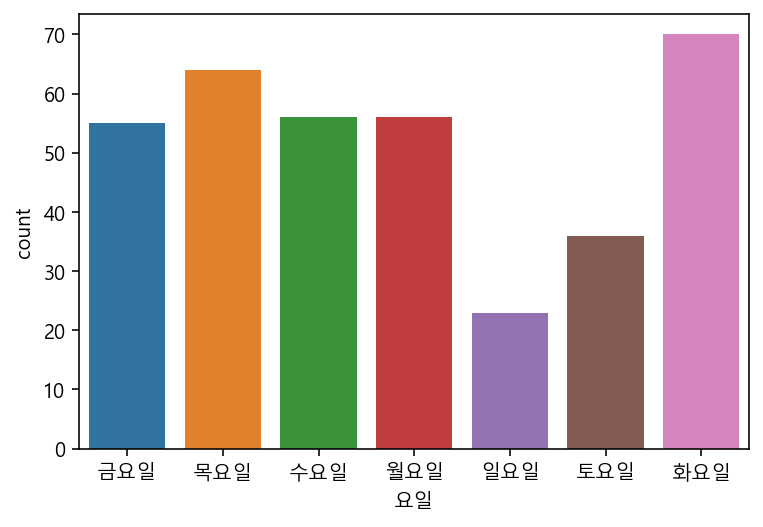

금요일    0.308989
목요일    0.321608
수요일    0.291667
월요일    0.270531
일요일    0.140244
토요일    0.209302
화요일    0.341463
Name: 요일, dtype: float64


In [26]:
# 시각화
sns.countplot(df_0['요일'])
plt.show()

# 전체 상품 분포와 비교
print(df_0['요일'].value_counts().sort_values().sort_index() / data['요일'].value_counts().sort_values().sort_index())

In [27]:
# # 일요일 상품 확인
# df_0[df_0['요일'] == '일요일']

### 시간대별 분포
- 클러스터 내에서는, 16 ~ 18시에 **유독** 많다. 
    - 애초에 많이 보이는 상품들.
- 전체 상품과 비교하면, 09시, 14시, 13시, 10시의 비중이 높은 편. 오히려 16~18시는 눈에 띄게 높지는 않다.

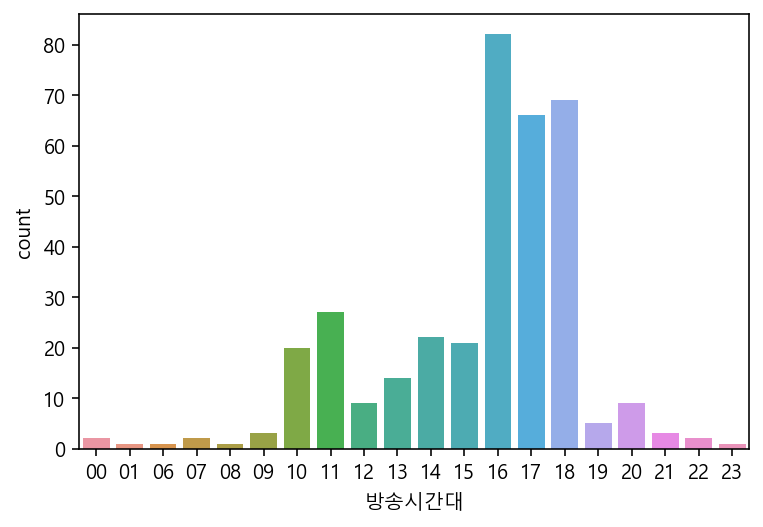

00    1.000000
08    1.000000
09    0.600000
14    0.407407
07    0.333333
13    0.333333
10    0.322581
18    0.309417
11    0.306818
16    0.304833
20    0.281250
23    0.250000
15    0.235955
17    0.234043
12    0.225000
06    0.166667
19    0.156250
21    0.136364
22    0.111111
01    0.027778
02         NaN
Name: 방송시간대, dtype: float64


In [28]:
# 시각화
sns.countplot(df_0['방송시간대'])
plt.show()

# 전체 상품 분포와 비교
print((df_0['방송시간대'].value_counts().sort_index() / data['방송시간대'].value_counts().sort_index()).sort_values(ascending=False))

In [36]:
# 오전 방송시간대 확인
df_0[df_0['방송시간대'].isin(['08', '09'])]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
496,12,겨울,일요일,2019-12-29 09:20:00,2019-12-29 10:20:00,09,60.0,농수축,100300,200965,[통영바다의보물] 국내산 냉동 참굴 200g x (10팩+2팩),39900.0,3286.090226,131115000.0,0.0
901,12,겨울,월요일,2019-12-09 09:20:00,2019-12-09 10:20:00,09,60.0,농수축,100637,201955,영산포숙성홍어회7팩,29900.0,4257.792642,127308000.0,0.0
1191,9,가을,토요일,2019-09-07 09:00:00,2019-09-07 10:00:00,09,60.0,농수축,100844,202489,하늘내린 용대리황태10마리,32900.0,4561.884498,150086000.0,0.0
1206,1,겨울,화요일,2019-01-29 08:00:00,2019-01-29 09:00:00,08,60.0,농수축,100844,202491,하늘내린 용대리황태10미,32900.0,2630.000000,86527000.0,0.0


In [37]:
# 오후 방송시간대 확인
df_0[df_0['방송시간대'].isin(['16', '17', '18'])]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
5,8,여름,토요일,2019-08-10 17:00:00,2019-08-10 18:00:00,17,60.0,농수축,100009,200013,AAB의 든든한 콩국수,39900.0,2311.328321,92222000.0,0.0
96,8,여름,금요일,2019-08-30 18:00:00,2019-08-30 19:00:00,18,60.0,농수축,100015,200024,잔다리 전두부세트,29900.0,2618.528428,78294000.0,0.0
106,8,여름,화요일,2019-08-20 16:00:00,2019-08-20 17:00:00,16,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,2760.797267,121199000.0,0.0
116,9,가을,목요일,2019-09-05 18:00:00,2019-09-05 19:00:00,18,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,3459.658314,151879000.0,0.0
117,9,가을,금요일,2019-09-06 17:00:00,2019-09-06 18:00:00,17,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,2681.207289,117705000.0,0.0
120,9,가을,일요일,2019-09-08 16:00:00,2019-09-08 17:00:00,16,60.0,농수축,100026,200038,궁중 손질새우 200미 + 동태포 400g,43900.0,3023.302961,132723000.0,0.0
122,1,겨울,화요일,2019-01-15 18:00:00,2019-01-15 19:00:00,18,60.0,농수축,100026,200039,궁중 손질새우 200미 + 동태포 200g,40900.0,3593.667482,146981000.0,0.0
123,1,겨울,목요일,2019-01-17 16:00:00,2019-01-17 17:00:00,16,60.0,농수축,100026,200039,궁중 손질새우 200미 + 동태포 200g,40900.0,3708.190709,151665000.0,0.0
130,1,겨울,수요일,2019-01-30 18:00:00,2019-01-30 19:00:00,18,60.0,농수축,100026,200039,궁중 손질새우 200미 + 동태포 200g,40900.0,2239.731051,91605000.0,0.0
149,9,가을,수요일,2019-09-18 16:00:00,2019-09-18 17:00:00,16,60.0,농수축,100046,200126,고칼슘검은콩두유48팩+호두아몬드 두유48팩,30900.0,4249.158576,131299000.0,0.0


In [53]:
# 00시, 08시 확인
df_0[df_0['방송시간대'].isin(['00', '08'])]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
1166,10,가을,토요일,2019-10-05 00:00:00,2019-10-05 00:45:28,00,45.466667,농수축,100841,202484,옛날 그 쥐포 110장 (11팩),32900.0,2983.556231,98159000.0,0.0
1178,12,겨울,월요일,2019-12-23 00:20:00,2019-12-23 01:20:00,00,60.000000,농수축,100841,202484,옛날 그 쥐포 110장 (11팩),32900.0,4434.072948,145881000.0,0.0
1206,1,겨울,화요일,2019-01-29 08:00:00,2019-01-29 09:00:00,08,60.000000,농수축,100844,202491,하늘내린 용대리황태10미,32900.0,2630.000000,86527000.0,0.0


### 각 범주별 취급액과의 관계 확인

- 전체적인 농수산 분포 특징과 마찬가지로, sum -> mean으로 가면 별 차이가 없어진다.
- 전체 농수산 편성과 달리 봄에 좀 많은 느낌이었는데, 취급액 sum은 봄이 적다.
- 이상치: 확인했는데 거의 비슷한 애들만 나오는 느낌?
    - 23시: 홍어. 이 군집 안에서는 대박난 느낌인데, 전체 농수산 판매량 평균과 비슷하다.

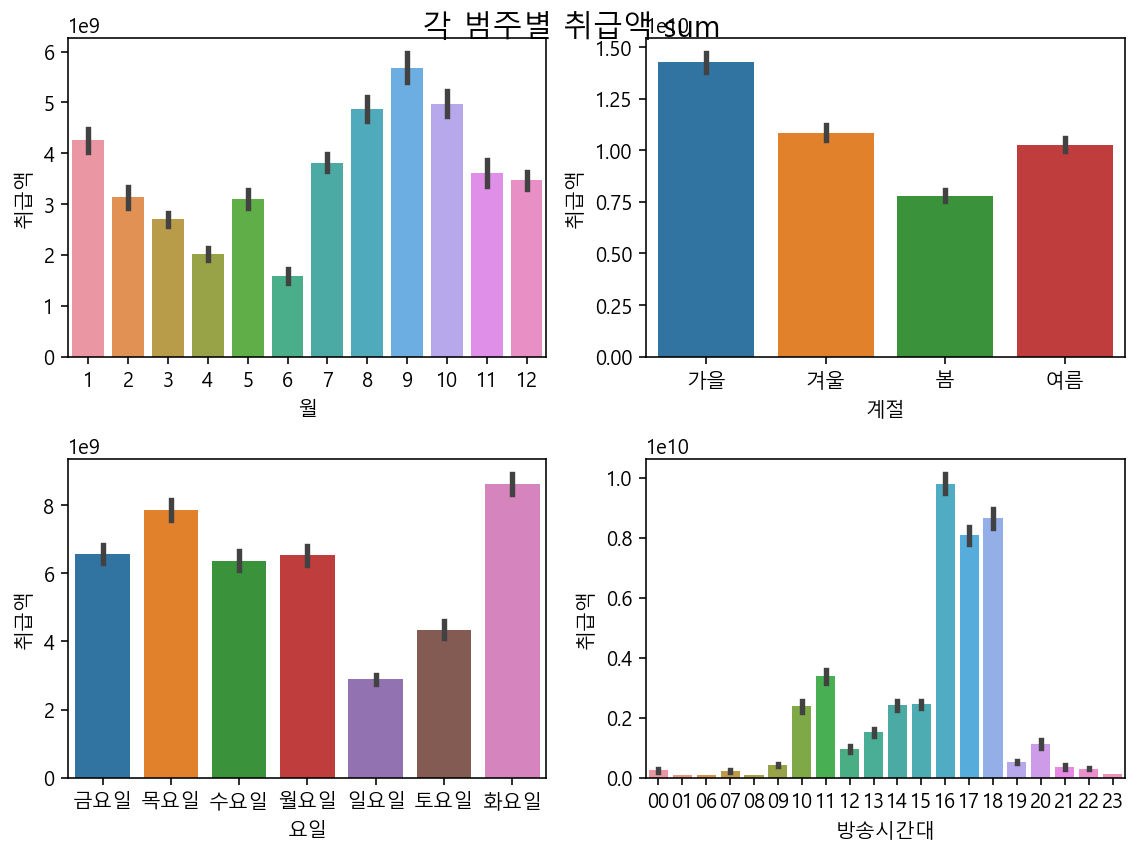

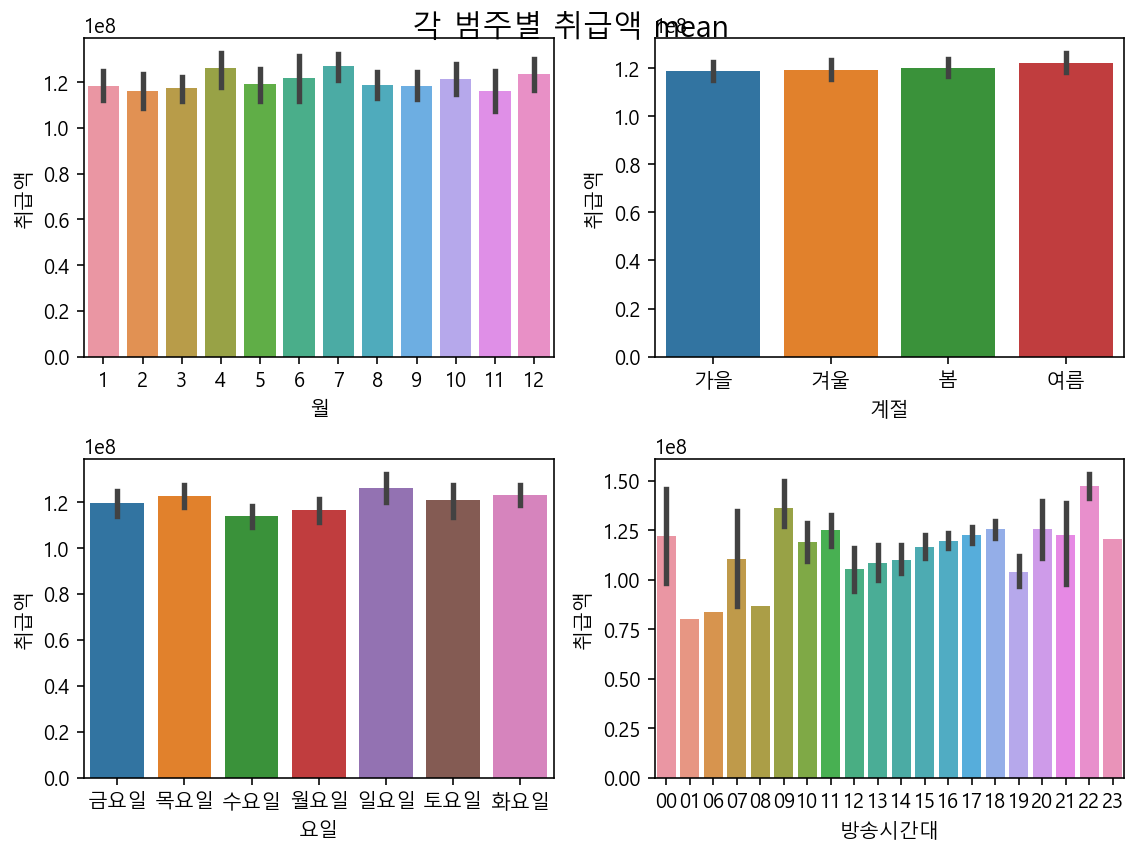

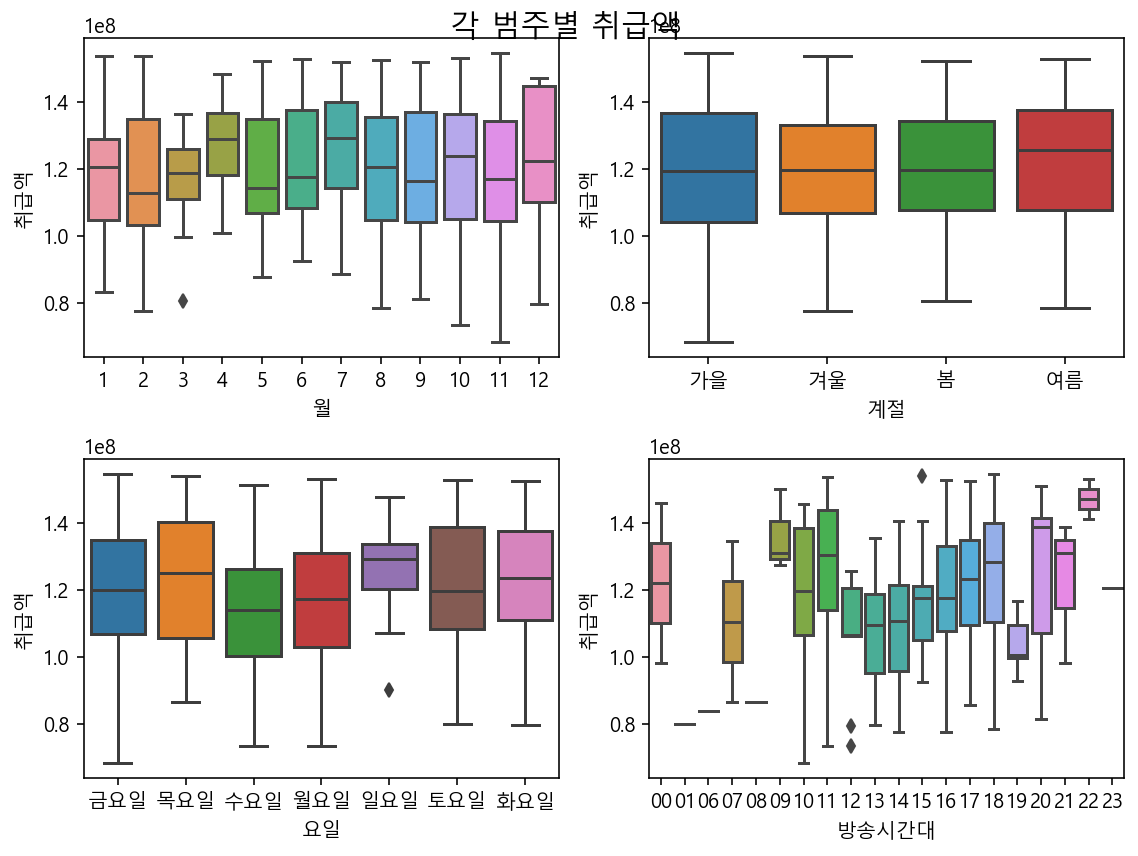

In [65]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'box')

In [67]:
# 방송시간대 이상치 확인
df_0[df_0['방송시간대'].isin(['12', '16'])]['상품명'].unique()

array(['궁중 손질새우 200미 + 동태포 400g', '궁중 손질새우 200미 + 동태포 200g',
       '고칼슘검은콩두유48팩+호두아몬드 두유48팩', '통뼈 감자탕 8팩',
       '영광 生 모시떡 100개!!(동부기피70개+검정깨30개)',
       '유귀열의 The 귀한 갓김치3kg+열무김치3kg, 총6kg',
       '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)', '안동간고등어 20팩', '우리바다 손질왕꼬막 20팩',
       '하림뼈없는양념닭발세트', '국내산 손질 통오징어 21미', '자연산 손질 통오징어 21미', '국내산참조기12팩',
       '현대어찬 손질갈치', '깐깐송도순 포기김치 10kg', '천연담아 명품다시팩 100포', '영산포숙성홍어회7팩',
       '강원도양구 간편시래기 + 시래기 들깨 무침', '국내산 손질 가자미 36미!', '영산포숙성 홍어8팩+무침3통',
       '김정문의 섬진강 재첩국 11팩 3.3kg', '이정섭의 비가린 배추김치 10kg', '장보고 완도매생이 30개',
       '국내산 손질 피꼬막 23팩', '참바다손질낙지100미+양념장+연포탕육수', '옛날 그 쥐포 110장 (11팩)',
       '하늘내린 용대리황태10미'], dtype=object)

In [68]:
# 요일 이상치 확인
df_0[df_0['요일'].isin(['일요일'])]['상품명'].unique()

array(['궁중 손질새우 200미 + 동태포 400g', '영광 生 모시떡 100개!!(동부기피70개+검정깨30개)',
       '영광 生 모시떡 130개(동부기피80개+검정깨50개)', '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)',
       '안동간고등어 20팩', '[통영바다의보물] 국내산 냉동 참굴 200g x (10팩+2팩)', '하림뼈없는양념닭발세트',
       '자연산 손질 통오징어 21미', '현대어찬 손질갈치', '깐깐송도순 포기김치 10kg',
       '천연담아 명품다시팩 100포', '영산포숙성 홍어8팩+무침3통', '옛날 그 쥐포 110장 (11팩)',
       '하늘내린 용대리황태10마리'], dtype=object)

### 각 범주별 판매량과의 관계 확인
취급액과 비슷한 느낌.

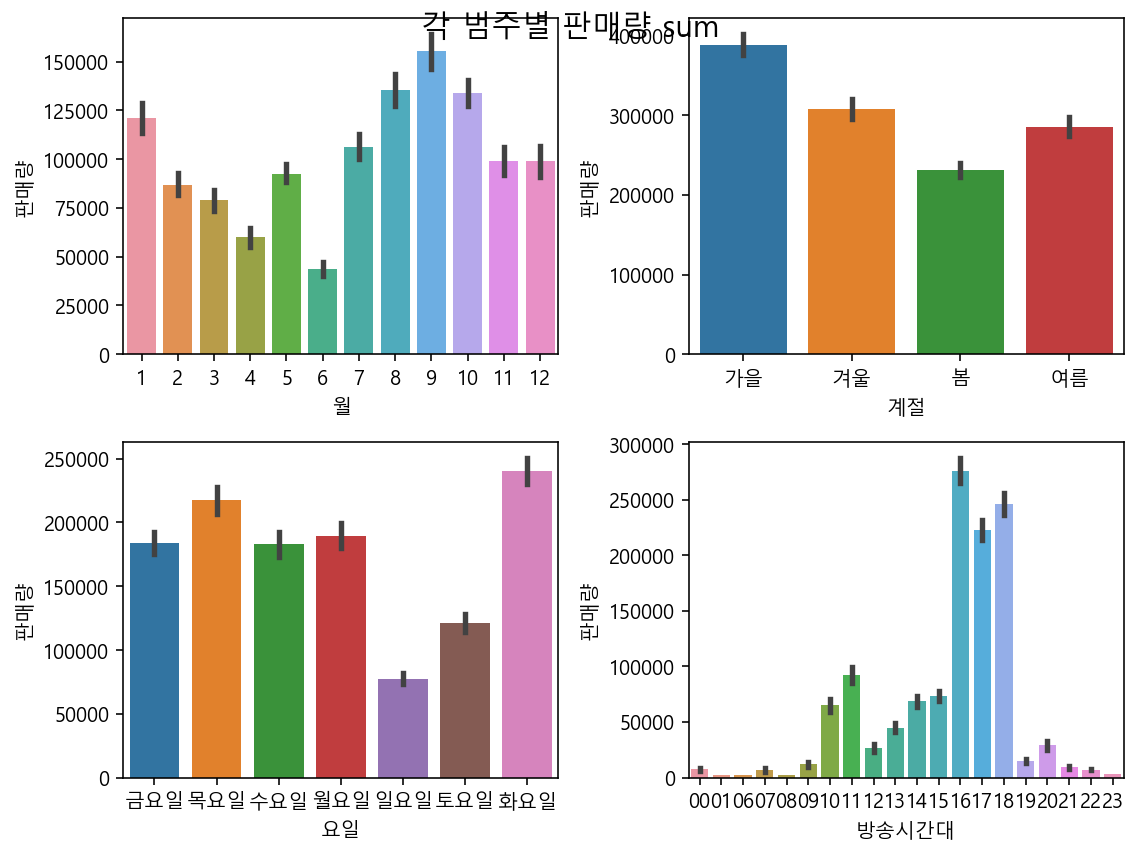

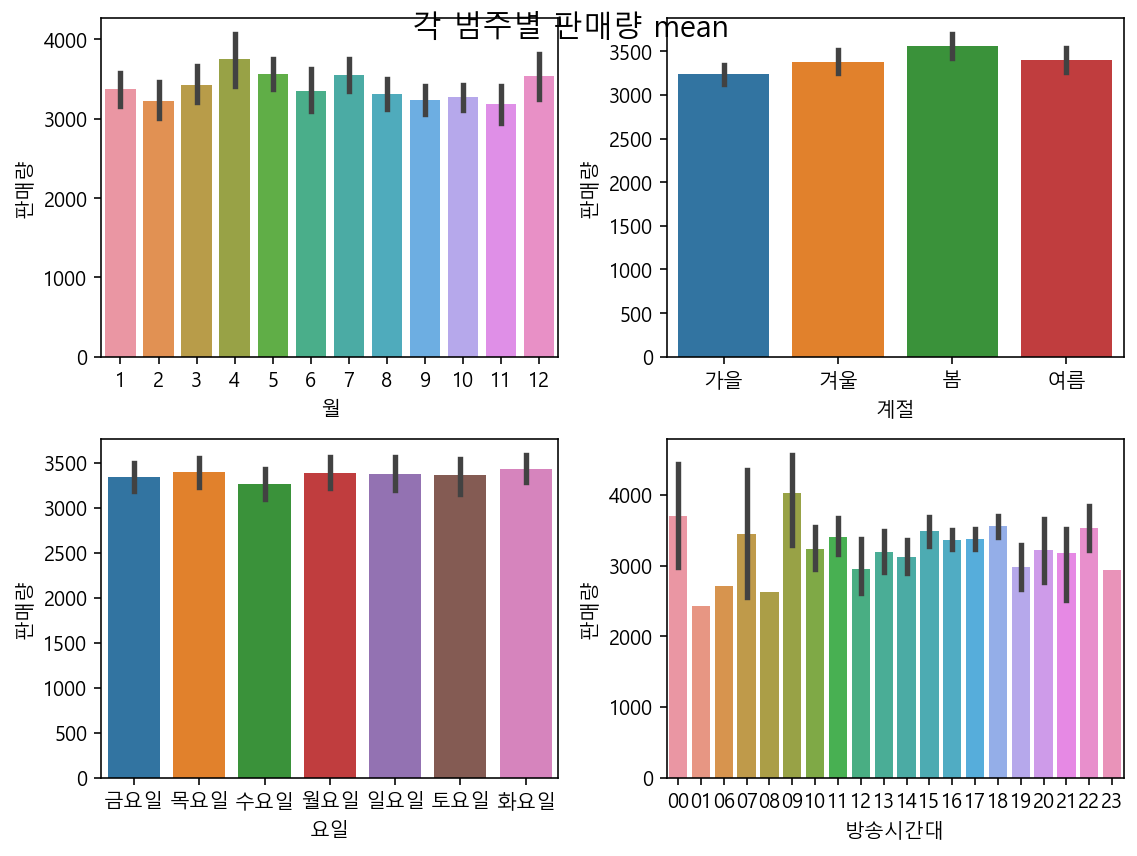

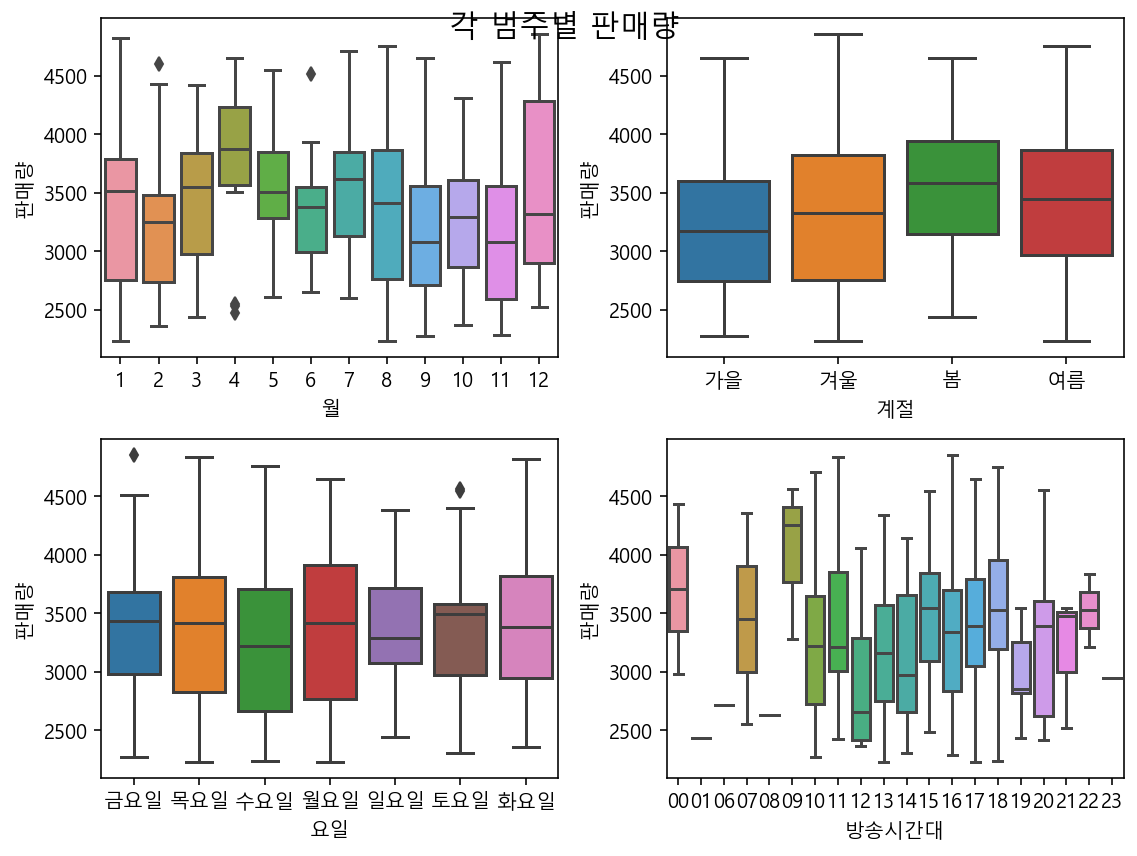

In [69]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'box')

### 각 범주별 판매단가와의 관계 확인
- 판매단가 거기서 거기인데

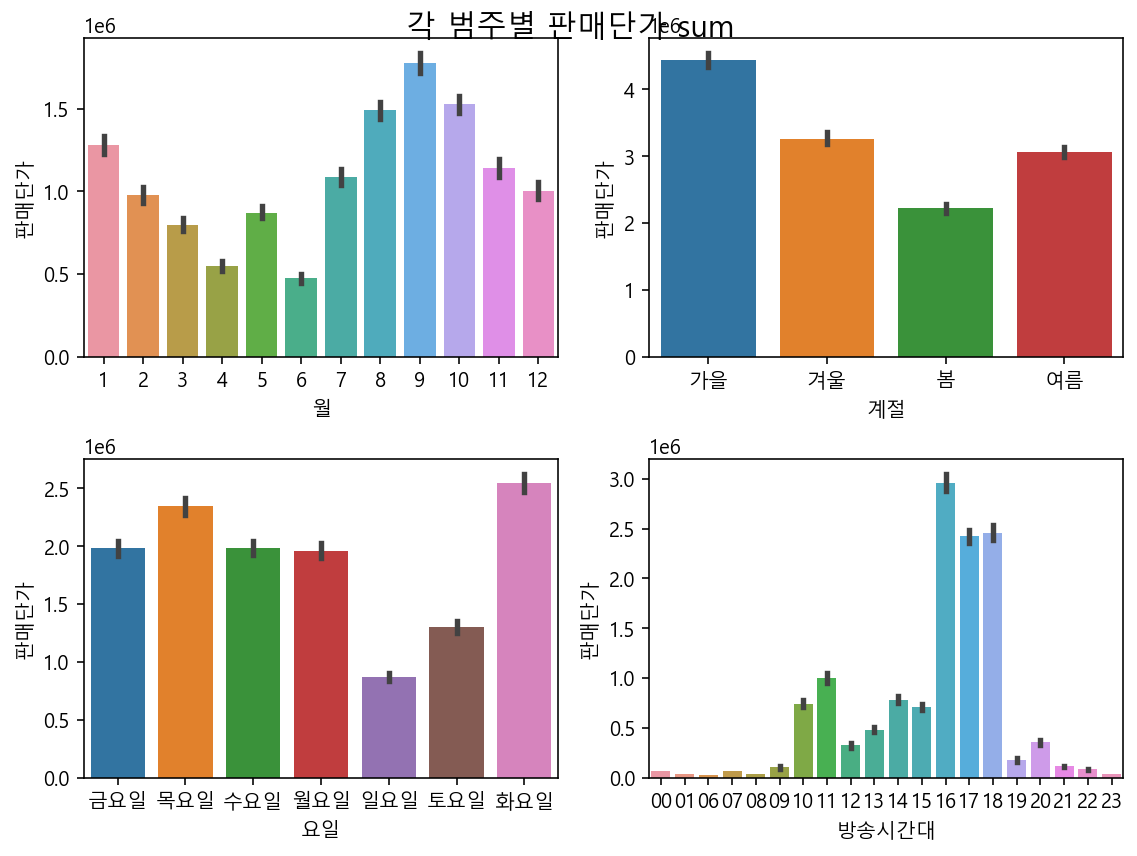

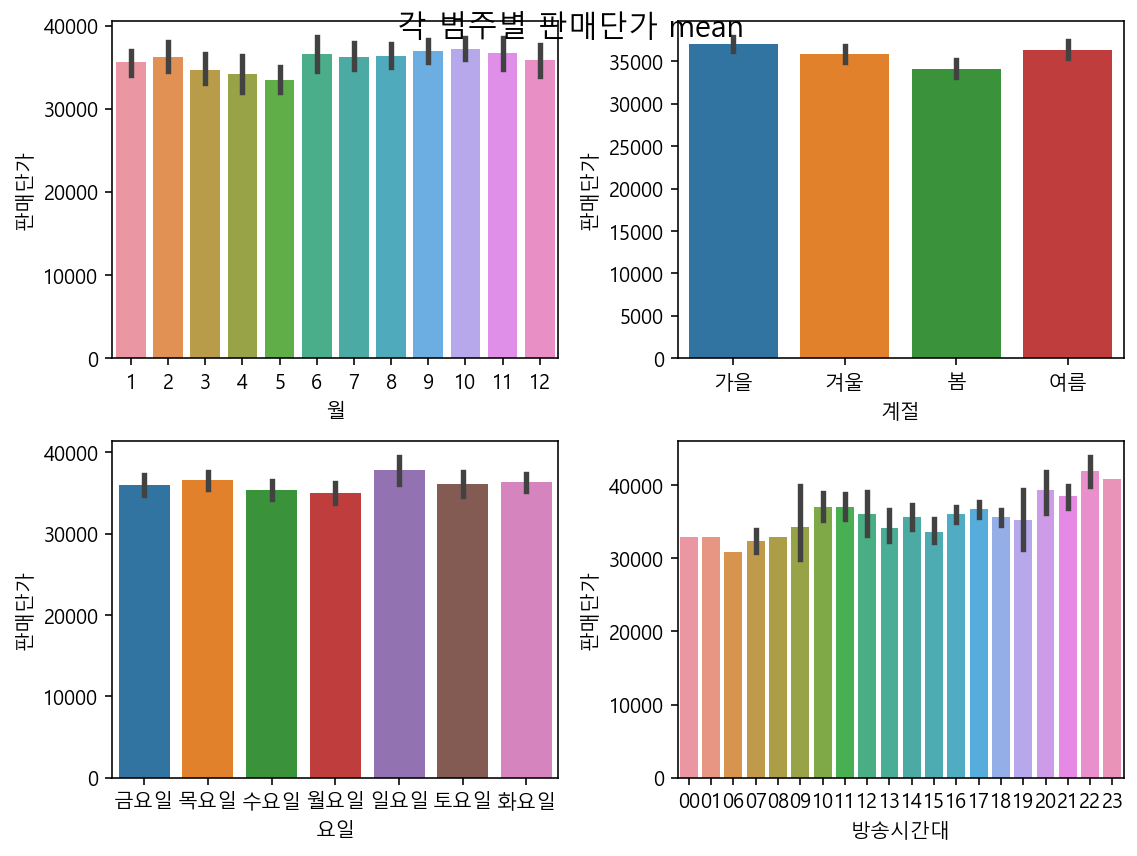

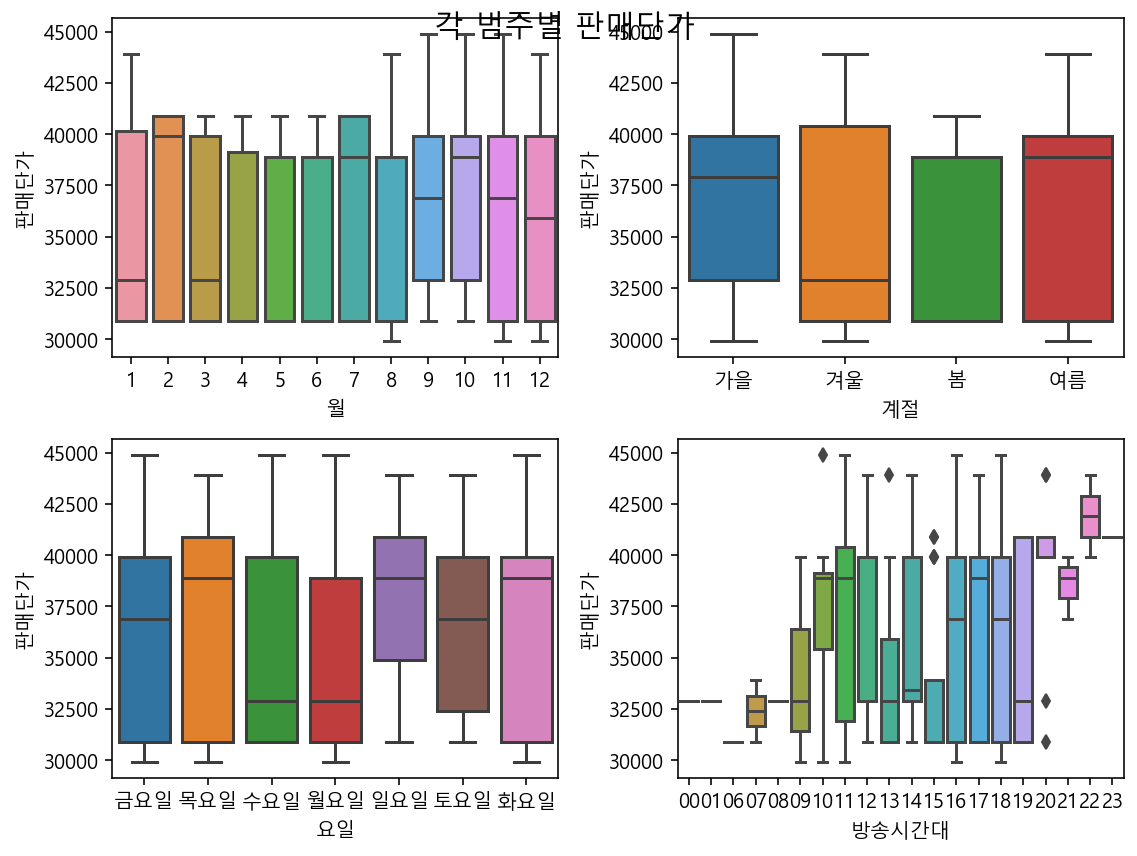

In [70]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매단가', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매단가', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매단가', 'box')

### 각 범주별 노출 시간과의 관계 확인

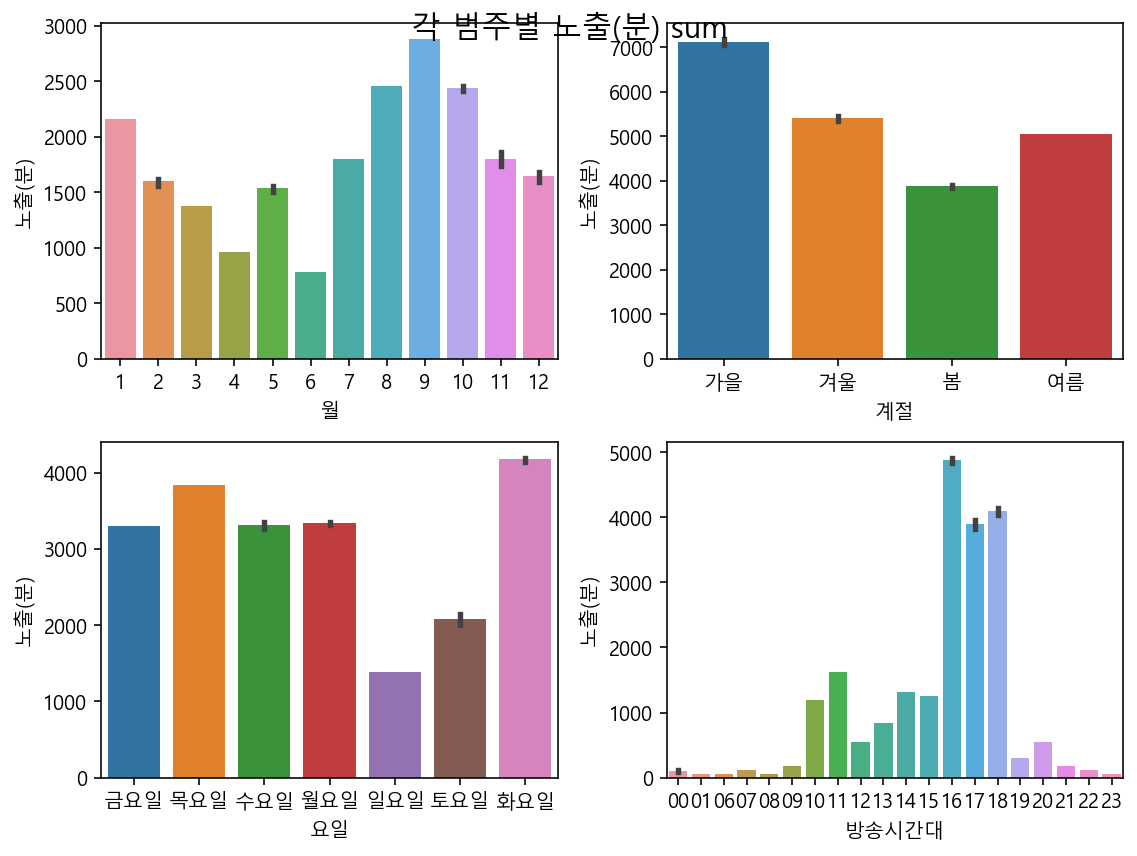

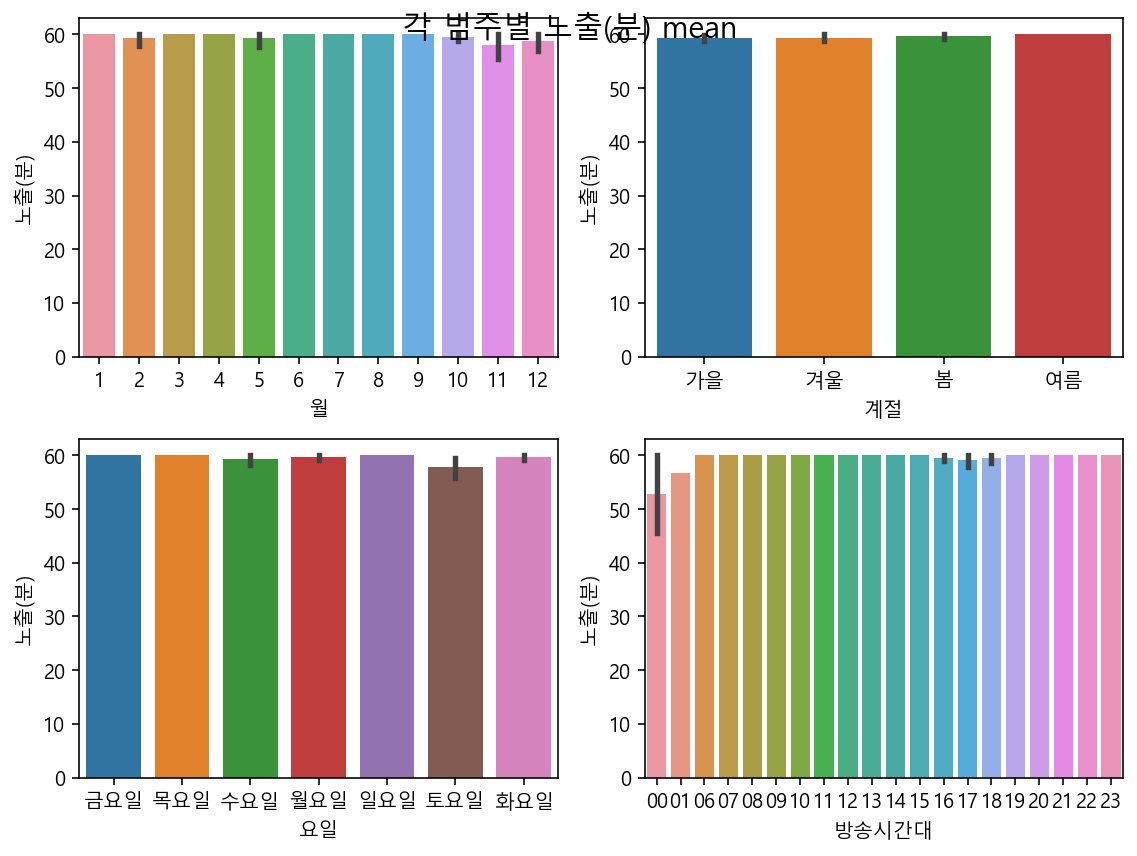

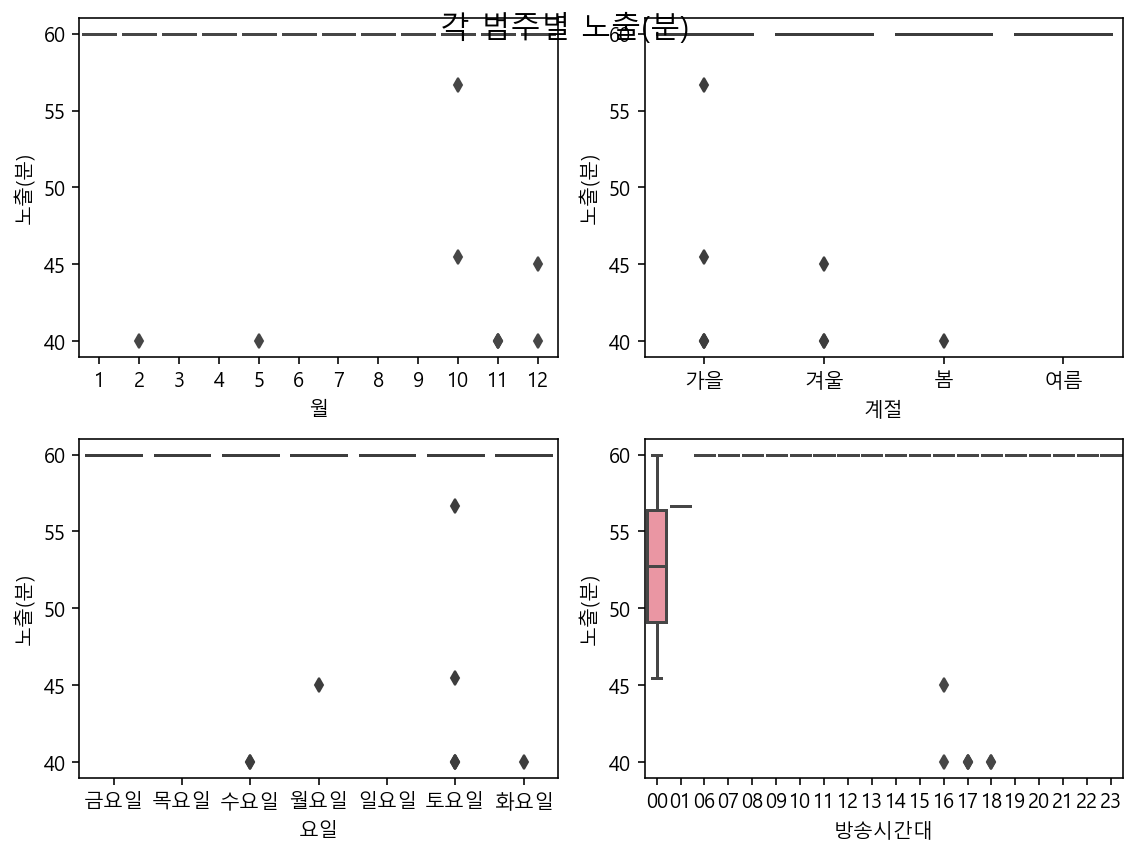

In [71]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'box')

### 월별 방송시간대

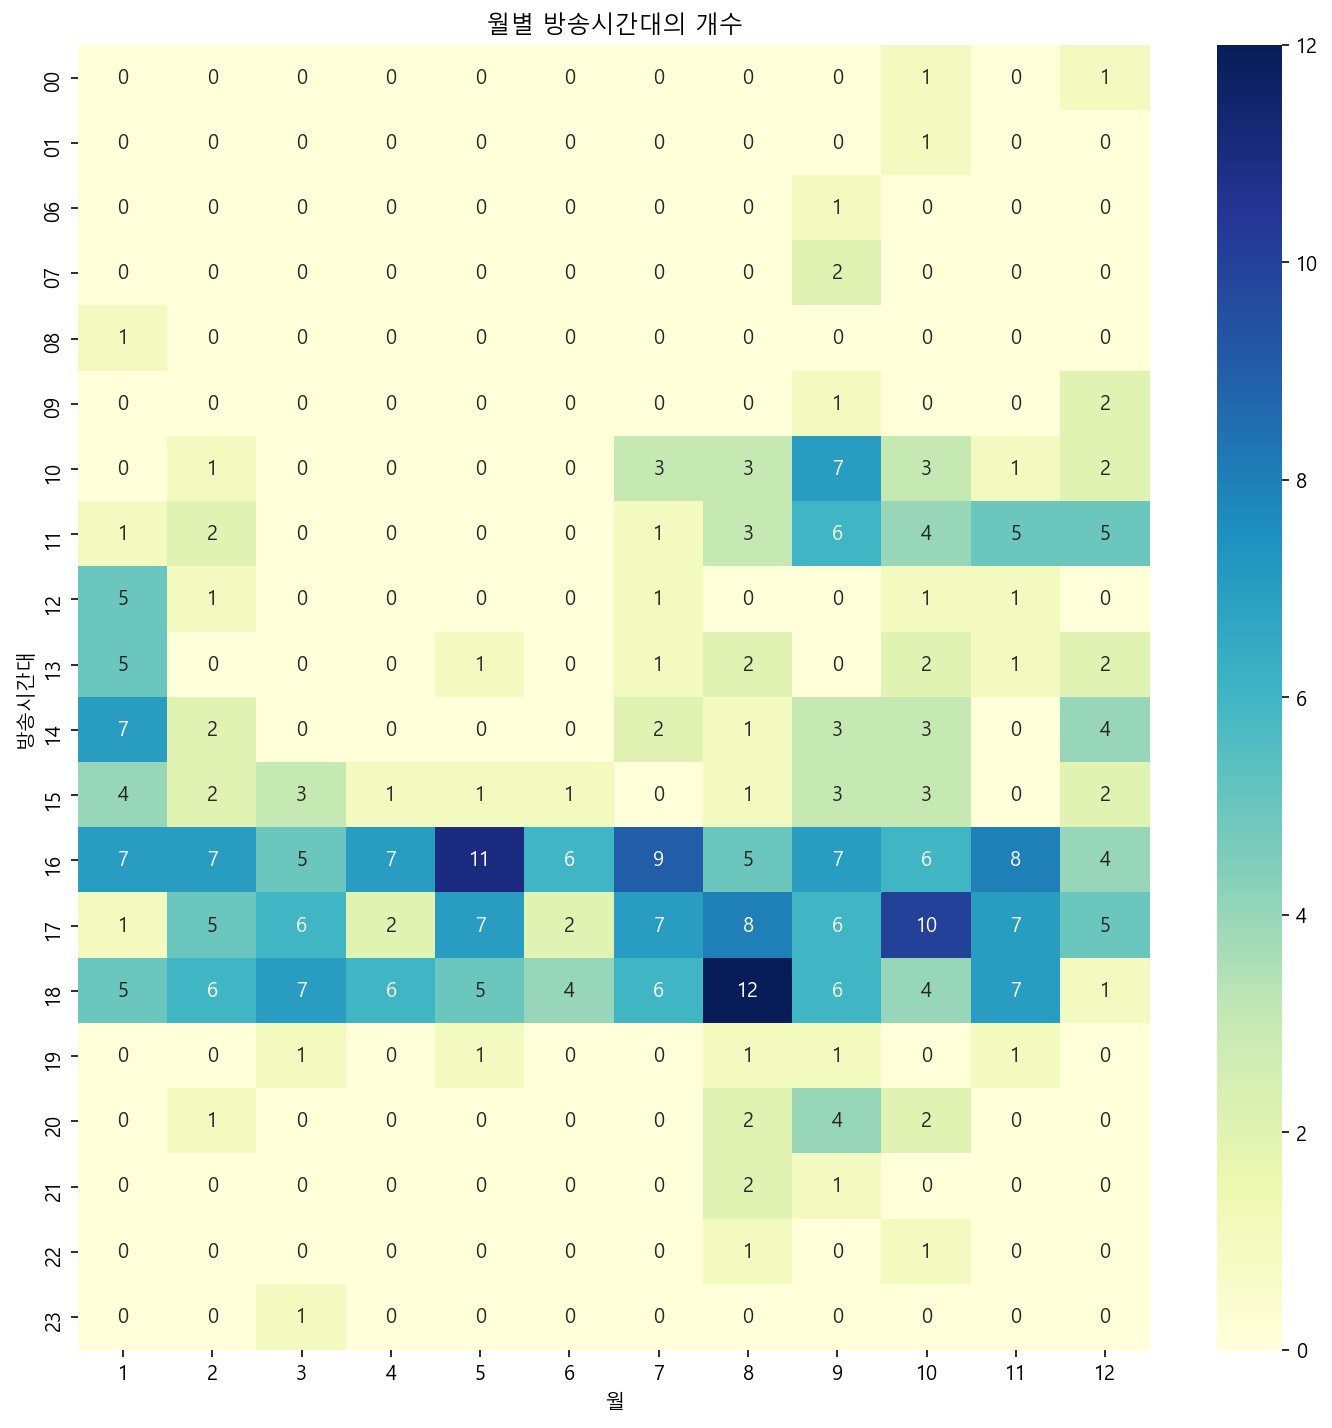

In [72]:
countCatCat(df_0, '방송시간대', '월')

# 중간평가
- cluster 0까지 봤을 때는 전체적으로 농수축 경향성 따라가는 듯.
- 상품명 몇 개 특이한 거 있었는데, 전반적으로 많이 나오는 애라서 특이하다고는 말 못하겠다.
- 조금 더 봐볼 것.